In [33]:
# 读取数据

import os

run_time_min = []
run_time_max = []
run_time = []
memory_min = []
memory_max = []
memory = []
for cur_gran in range(2,6):
    print(cur_gran)
    data_path = f'data/{cur_gran}/'
    # 查找第一个csv文件，读取数据
    file_list = os.listdir(data_path)
    file_list.sort()
    file_name = ''
    for file in file_list:
        if file.endswith('.csv'):
            file_name = file
            break
    print(file_name)
    # 读取数据
    import pandas as pd
    df = pd.read_csv(data_path + file_name)

    # run_time_min
    # 筛选列名后有 runtime__MIN的列，取第一行，求平均值
    df_runtime_min = df.filter(regex='runtime__MIN')
    run_time_min_mean = df_runtime_min.iloc[0].mean()
    # 转换为分钟
    run_time_min_mean = run_time_min_mean / 60
    print(f'run_time_min_mean: {run_time_min_mean}')
    run_time_min.append(run_time_min_mean)

    # run_time_max
    # 筛选列名后有 runtime__MAX的列，取第一行，求平均值
    df_runtime_max = df.filter(regex='runtime__MAX')
    run_time_max_mean = df_runtime_max.iloc[0].mean()
    # 转换为分钟
    run_time_max_mean = run_time_max_mean / 60
    print(f'run_time_max_mean: {run_time_max_mean}')
    run_time_max.append(run_time_max_mean)

    # run_time
    # 筛选列名后有 runtime的列，取第一行，求平均值
    df_runtime = df.filter(regex='runtime')
    run_time_mean = df_runtime.iloc[0].mean()
    # 转换为分钟
    run_time_mean = run_time_mean / 60
    print(f'run_time_mean: {run_time_mean}')
    run_time.append(run_time_mean)

    # memory_min    
    # 筛选列名后有 memoryAllocatedBytes__MIN的列，取第一行，求平均值
    df_memory_min = df.filter(regex='memoryAllocatedBytes__MIN')
    memory_min_mean = df_memory_min.iloc[0].mean()
    # 转换为GB
    memory_min_mean = memory_min_mean / 1024 / 1024 / 1024
    print(f'memory_min_mean: {memory_min_mean}')
    memory_min.append(memory_min_mean)

    # memory_max
    # 筛选列名后有 memoryAllocatedBytes__MAX的列，取第一行，求平均值
    df_memory_max = df.filter(regex='memoryAllocatedBytes__MAX')
    memory_max_mean = df_memory_max.iloc[0].mean()
    # 转换为GB
    memory_max_mean = memory_max_mean / 1024 / 1024 / 1024
    print(f'memory_max_mean: {memory_max_mean}')
    memory_max.append(memory_max_mean)


    # memory
    # 筛选列名后有 memoryAllocatedBytes的列，取第一行，求平均值
    df_memory = df.filter(regex='memoryAllocatedBytes')
    memory_mean = df_memory.iloc[0].mean()
    # 转换为GB
    memory_mean = memory_mean / 1024 / 1024 / 1024
    print(f'memory_mean: {memory_mean}')
    memory.append(memory_mean)

    # break   


2
wandb_export_2023-11-12T10_36_41.867+08_00.csv
run_time_min_mean: 1.0187153800000002
run_time_max_mean: 14.788161403333334
run_time_mean: 7.896060281021892
memory_min_mean: 5.983640950521454
memory_max_mean: 16.2313232421875
memory_mean: 10.645062701056263
3
wandb_export_2023-11-12T10_38_49.110+08_00.csv
run_time_min_mean: 1.0176795016666667
run_time_max_mean: 28.254767785000006
run_time_mean: 14.61898064840719
memory_min_mean: 12.384539388021455
memory_max_mean: 31.137469075521455
memory_mean: 20.501271337716876
4
wandb_export_2023-11-12T17_14_20.964+08_00.csv
run_time_min_mean: 1.01740326
run_time_max_mean: 26.60957662666667
run_time_mean: 13.777044953367263
memory_min_mean: 8.844031575521454
memory_max_mean: 30.45220865885355
memory_mean: 18.485370930370685
5
wandb_export_2023-11-12T10_44_55.863+08_00.csv
run_time_min_mean: 1.0170560583333335
run_time_max_mean: 33.65614643
run_time_mean: 17.330261330571897
memory_min_mean: 12.915489908853544
memory_max_mean: 37.3789794921875
memor

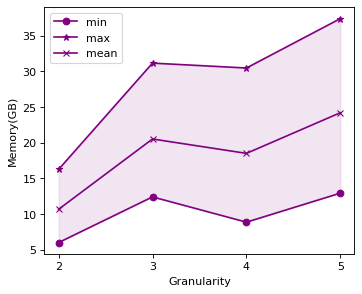

In [41]:
import matplotlib.pyplot as plt  
import numpy as np  
  
# 设置画布大小  
plt.figure(figsize=(5, 4), dpi=80)  
# 设置x轴刻度  
plt.xticks(np.arange(2, 6, 1))  
# 设置y轴刻度  
  
# 设置x轴标签  
plt.xlabel('Granularity')  
# 设置y轴标签  
plt.ylabel('Memory(GB)')  
# 画出线条，点用不同的记号表示  
plt.plot(range(2,6), memory_min, label='min',marker='o', color='purple')  
plt.plot(range(2,6), memory_max, label='max', marker='*', color='purple')  
plt.plot(range(2,6), memory, label='mean', marker='x', color='purple')  
  
# 两条线之间填充颜色  
plt.fill_between(range(2,6), memory_min, memory_max, color='purple', alpha=0.1)
# 显示图例  
plt.legend()  
# 显示图像  
plt.show()  


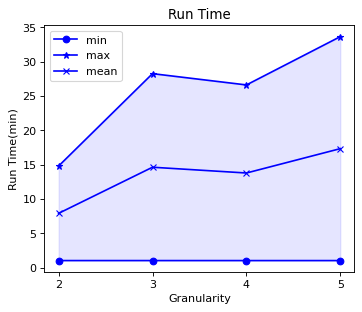

In [43]:
# 对run_time进行画图，分别画出min，max，mean
import matplotlib.pyplot as plt
import numpy as np

# 设置画布大小
plt.figure(figsize=(5, 4), dpi=80)
# 设置x轴刻度
plt.xticks(np.arange(2, 6, 1))
# 设置y轴刻度

# 设置x轴标签
plt.xlabel('Granularity')
# 设置y轴标签
plt.ylabel('Run Time(min)')
# 设置标题
plt.title('Run Time')
# 画出线条
plt.plot(range(2,6), run_time_min, label='min', marker='o', color='blue')
plt.plot(range(2,6), run_time_max, label='max', marker='*', color='blue')
plt.plot(range(2,6), run_time, label='mean', marker='x', color='blue')

# 两条线之间填充颜色  
plt.fill_between(range(2,6), run_time_min, run_time_max, color='blue', alpha=0.1)
# 显示图例
plt.legend()
# 显示图像
plt.show()


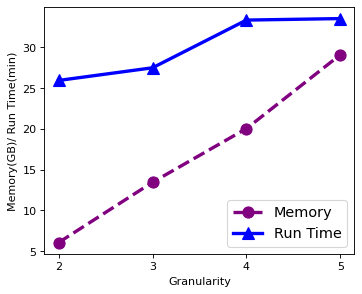

In [2]:

# 画times 和memorys，两个纵坐标
import matplotlib.pyplot as plt
import numpy as np


# solar 1_6 cuda0
# solar 1_2_4 cuda1
# solar 1_2_4_8 cuda2  time 1_2_4_12 cuda3
# solar 1_4_8_12_24 cuda3 
memorys = [6504185856,14437711872,21511405568,31233802240]
# times = [1556,1649,2111,2011]
times = [1556,1649,2000,2011]
memorys = [x / 1024 / 1024 / 1024 for x in memorys]
times = [x / 60 for x in times]


# 设置画布大小
plt.figure(figsize=(5, 4), dpi=80)
# 设置x轴刻度
plt.xticks(np.arange(2, 6, 1))
# 设置y轴刻度

# 设置x轴标签
plt.xlabel('Granularity')
# 设置y轴标签
plt.ylabel('Memory(GB)/ Run Time(min)')
# 设置标题
# plt.title('Memory and Run Time')
# 画出线条,设置线宽2，marker size也为2
# 
plt.plot(range(2,6), memorys, label='Memory', marker='o', color='purple', linestyle='--', linewidth=3, markersize=10)
# plt.plot(range(2,6), memorys, label='Memory', marker='o', color='purple', linestyle='--', linewidth=3)
plt.plot(range(2,6), times, label='Run Time', marker='^', color='blue', linewidth=3, markersize=10)


# 所有字号设置为18
plt.rcParams.update({'font.size': 13})

# 显示图例,右下角
plt.legend(loc='lower right')
# 保存图片
plt.savefig('memory_runtime.pdf', bbox_inches='tight')


In [10]:
# 数据转化成表格
import pandas as pd
df = pd.DataFrame()
df['Granularity'] = range(2,6)
df['Memory'] = memorys
df['Run Time'] = times
df['Memory Incease Rate'] = df['Memory']/df['Memory'][0]
df['Run Time Decrease Rate'] = df['Run Time']/df['Run Time'][0]


In [17]:
print(df)
df.to_csv('memory_runtime.xlsx', index=False, float_format='%.2f')

   Granularity     Memory   Run Time  Memory Incease Rate  \
0            2   6.057495  25.933333             1.000000   
1            3  13.446167  27.483333             2.219757   
2            4  20.034058  33.333333             3.307317   
3            5  29.088745  33.516667             4.802108   

   Run Time Decrease Rate  
0                1.000000  
1                1.059769  
2                1.285347  
3                1.292416  
